In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import datetime as dt

# LOAD DATASET 

In [2]:
# Load Dataset
df = pd.read_csv("soccer21-22.csv")

# DATA WRANGLING, CLEANING AND FEATURE ENGINEERING

In [3]:
# Test
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,...,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,...,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,...,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,...,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,Everton,Southampton,3,1,H,0,1,A,A Madley,...,6,3,13,15,6,8,2,0,0,0


In [4]:
# To Cut the dataset to make it readable
ndf = pd.DataFrame(df, columns=["Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR", "HTHG", "HTAG", "HTR", "Referee"])

In [5]:
# Test 
ndf.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver
1,14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote
3,14/08/2021,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss
4,14/08/2021,Everton,Southampton,3,1,H,0,1,A,A Madley


In [6]:
# To save dataset
ndf.to_csv("2021-2022_Premier_League_Soccer.xlx.csv")

In [7]:
# Check for invalid values
ndf["Date"].value_counts()

Date
22/05/2022    10
11/09/2021     8
19/02/2022     8
20/11/2021     8
25/09/2021     7
              ..
18/03/2022     1
19/03/2022     1
06/12/2021     1
21/01/2022     1
13/08/2021     1
Name: count, Length: 123, dtype: int64

In [8]:
# Check missing values
ndf["Date"].isnull().sum()

0

In [9]:
# Check overall missing values of dataset
ndf.isnull().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
dtype: int64

In [10]:
# Check duplicate values of the whole dataset
ndf.duplicated().sum()

0

In [11]:
# General information about dataset
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      380 non-null    object
 1   HomeTeam  380 non-null    object
 2   AwayTeam  380 non-null    object
 3   FTHG      380 non-null    int64 
 4   FTAG      380 non-null    int64 
 5   FTR       380 non-null    object
 6   HTHG      380 non-null    int64 
 7   HTAG      380 non-null    int64 
 8   HTR       380 non-null    object
 9   Referee   380 non-null    object
dtypes: int64(4), object(6)
memory usage: 29.8+ KB


### 1. Remove invalid values and convert Date column into Datetime64.

In [12]:
# Convert Date column to Datetime64
ndf["Date"] = pd.to_datetime(ndf["Date"], dayfirst=True)

In [13]:
# Check invalid values in the HomeTeam column
ndf["HomeTeam"].value_counts()

HomeTeam
Brentford         19
Man United        19
Arsenal           19
Wolves            19
Southampton       19
Brighton          19
Man City          19
Leeds             19
Crystal Palace    19
Aston Villa       19
Liverpool         19
Tottenham         19
Newcastle         19
Norwich           19
Watford           19
Leicester         19
Everton           19
Chelsea           19
Burnley           19
West Ham          19
Name: count, dtype: int64

In [14]:
# Check invalid values in the AwayTeam column
ndf["AwayTeam"].value_counts()

AwayTeam
Arsenal           19
Leeds             19
Chelsea           19
Tottenham         19
Man United        19
Watford           19
Norwich           19
Everton           19
Brentford         19
Newcastle         19
Burnley           19
Man City          19
West Ham          19
Liverpool         19
Aston Villa       19
Wolves            19
Southampton       19
Crystal Palace    19
Brighton          19
Leicester         19
Name: count, dtype: int64

In [15]:
# Check invalid values
ndf["FTHG"].value_counts()

FTHG
1    121
0     93
2     89
3     50
4     15
5      8
7      2
6      2
Name: count, dtype: int64

### 2. Convert numerical columns to low datatypes to save memory. 

In [16]:
# Convert dtypes to save memory
ndf["FTHG"] = ndf["FTHG"].astype("int32")
ndf["FTAG"] = ndf["FTAG"].astype("int32")
ndf["HTHG"] = ndf["HTHG"].astype("int32")
ndf["HTAG"] = ndf["HTAG"].astype("int32")

In [17]:
# Test
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      380 non-null    datetime64[ns]
 1   HomeTeam  380 non-null    object        
 2   AwayTeam  380 non-null    object        
 3   FTHG      380 non-null    int32         
 4   FTAG      380 non-null    int32         
 5   FTR       380 non-null    object        
 6   HTHG      380 non-null    int32         
 7   HTAG      380 non-null    int32         
 8   HTR       380 non-null    object        
 9   Referee   380 non-null    object        
dtypes: datetime64[ns](1), int32(4), object(5)
memory usage: 23.9+ KB


## FEATURE ENGINEERING

### 3. Create month column using feature engineering 

In [18]:
# Create month column
ndf["Month"] = ndf["Date"].dt.month_name()

### 4. Create total goals column. 

In [19]:
# New column
ndf["TotalGoals"] = ndf["FTHG"] + ndf["FTAG"]

In [20]:
# Test
ndf.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,Month,TotalGoals
0,2021-08-13,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,August,2
1,2021-08-14,Man United,Leeds,5,1,H,1,0,H,P Tierney,August,6
2,2021-08-14,Burnley,Brighton,1,2,A,1,0,H,D Coote,August,3
3,2021-08-14,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,August,3
4,2021-08-14,Everton,Southampton,3,1,H,0,1,A,A Madley,August,4


# DATA ANALYSIS

### 1. Find average goals per match? 

In [21]:
# Average goals per match
(ndf["FTHG"] + ndf["FTAG"]).mean()

2.818421052631579

### 2. Find average goals per season?

In [23]:
# Average goals per season
ndf.groupby("Date")["TotalGoals"].mean()

Date
2021-08-13    2.000000
2021-08-14    3.571429
2021-08-15    3.500000
2021-08-21    2.500000
2021-08-22    1.666667
                ...   
2022-05-15    3.142857
2022-05-16    2.000000
2022-05-17    3.000000
2022-05-19    3.000000
2022-05-22    3.900000
Name: TotalGoals, Length: 123, dtype: float64

### 3. Find biggest match difference?

In [27]:
# HomeTeam
(ndf["FTHG"] - ndf["FTAG"]).max()

7

In [28]:
# AwayTeam
(ndf["FTAG"] - ndf["FTHG"]).max()

6

### 4. Which is the team with most away wins? 

In [47]:
ndf.loc[ndf["HTR"] == "A"]["AwayTeam"].value_counts().sort_values(ascending=False).head(1)
# Another way to fetch
# ndf[ndf["HTR"] == "A"]["AwayTeam"].value_counts().sort_values(ascending=False).head(1)

AwayTeam
Man City    10
Name: count, dtype: int64

### 5. Which is the team with most goals scored at home?

In [51]:
# Team with most goals
ndf.groupby("HomeTeam")["FTHG"].sum().sort_values(ascending=False).head(1)

HomeTeam
Man City    58
Name: FTHG, dtype: int32

### 6. Find the team with least goals recieved at home? 

In [63]:
# Team with least goals
ndf.groupby("HomeTeam")["FTAG"].sum().sort_values(ascending=True).head(2)

HomeTeam
Liverpool     9
Man City     15
Name: FTAG, dtype: int32

In [68]:
# Confirmation
ndf.groupby("HomeTeam")[["HomeTeam", "FTAG"]].agg(
    {"HomeTeam":"size", "FTAG":"sum"}).sort_values(by="FTAG", ascending=True).head(2)

,HomeTeam,FTAG
HomeTeam,,
Liverpool,19,9
Man City,19,15


### 7. Find team with most goals playing as a visitor ( away from home )?

In [59]:
# Team with most goals
ndf.groupby("AwayTeam")["FTAG"].sum().sort_values(ascending=False).head(1)

AwayTeam
Liverpool    45
Name: FTAG, dtype: int32

In [ ]:
# Confirmation
ndf[ndf["AwayTeam"] == "Liverpool"]["FTAG"].sum()

# DATA VISUALIZATION

### 1. Find average goals per season?

Text(0.5, 1.0, 'Average goals per season')

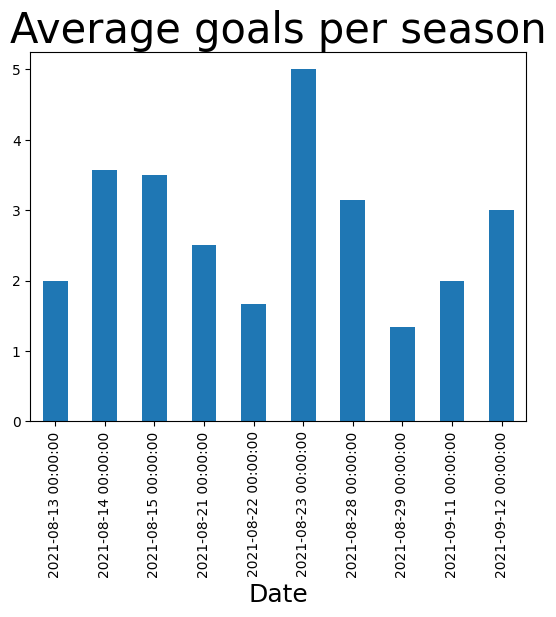

In [72]:
# Average goals per season
ndf.groupby("Date")["TotalGoals"].mean().head(10).plot(kind="bar")
plt.xlabel("Date", fontsize=18)
plt.title("Average goals per season", fontsize=30)

### 2. Teams with most away wins

<Axes: ylabel='count'>

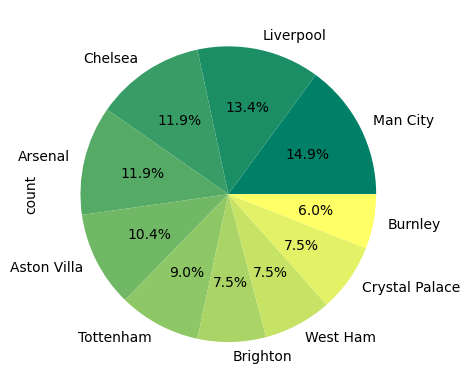

In [77]:
ndf.loc[ndf["HTR"] == "A"]["AwayTeam"].value_counts().sort_values(
    ascending=False).head(10).plot(kind="pie", autopct="%0.1f%%", cmap="summer")

### 3. Teams with most goals at home

<Axes: ylabel='FTHG'>

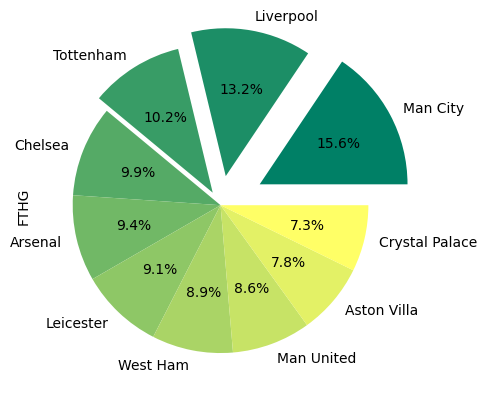

In [87]:
ndf.groupby("HomeTeam")["FTHG"].sum().sort_values(
    ascending=False).head(10).plot(kind="pie", autopct="%0.1f%%", cmap="summer", explode=[0.3, 0.2, 0.1, 0, 0, 0, 0 ,0 , 0, 0])

### 4. Teams with least goals recieved at home

<Axes: ylabel='FTAG'>

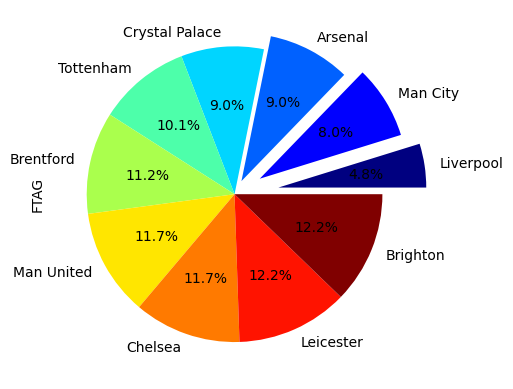

In [90]:
# Team with least goals
ndf.groupby("HomeTeam")["FTAG"].sum().sort_values(
    ascending=True).head(10).plot(kind="pie", autopct="%0.1f%%", cmap="jet", explode=[0.3, 0.2, 0.1, 0, 0, 0, 0 ,0 , 0, 0])

### 5. Teams with most goals playing as a visitor ( away team )

<Axes: ylabel='FTAG'>

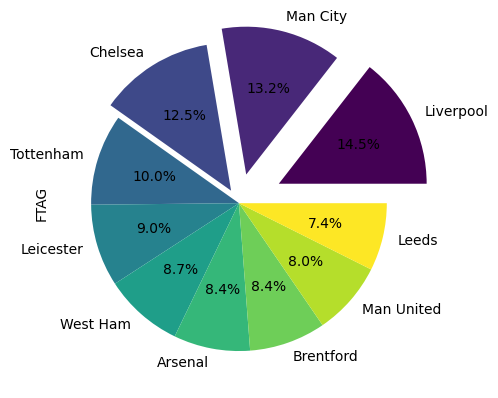

In [89]:
# Team with most goals
ndf.groupby("AwayTeam")["FTAG"].sum().sort_values(
    ascending=False).head(10).plot(kind="pie", autopct="%0.1f%%", cmap="viridis", explode=[0.3, 0.2, 0.1, 0, 0, 0, 0 ,0 , 0, 0])